In [1]:
import matplotlib.pyplot as plt     # displaying images and plots
import numpy as np                  # numerical computations (especially SVD)
from matplotlib.image import imread # read image from a file
import cv2

In [2]:
# 1. Read the image
A = cv2.imread('/home/kanchnak/code/image-compression-with-SVD/images/boat.jpg')
B, G, R = cv2.split(A)

In [3]:
cv2.imwrite(f'/home/kanchnak/code/image-compression-with-SVD/output_color/original_color.jpg', A)

True

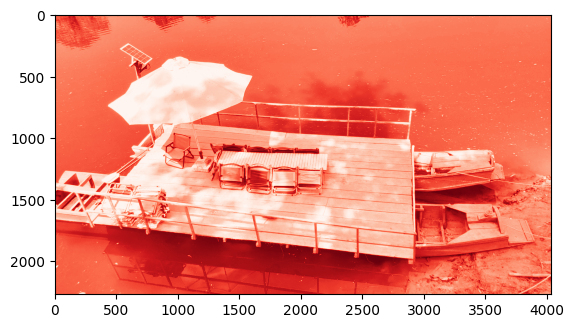

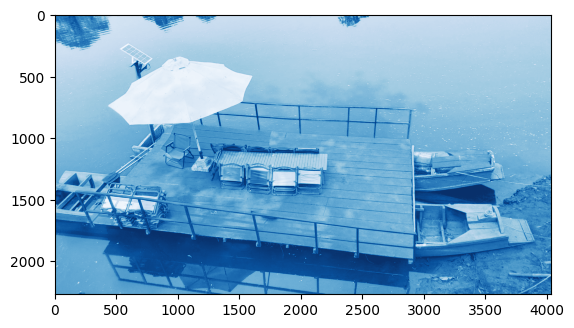

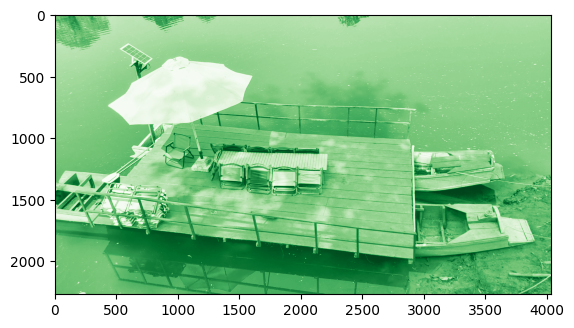

In [4]:
plt.imshow(R, cmap='Reds_r')
plt.show()
plt.imshow(B, cmap='Blues_r')
plt.show()
plt.imshow(G, cmap='Greens_r')
plt.show()

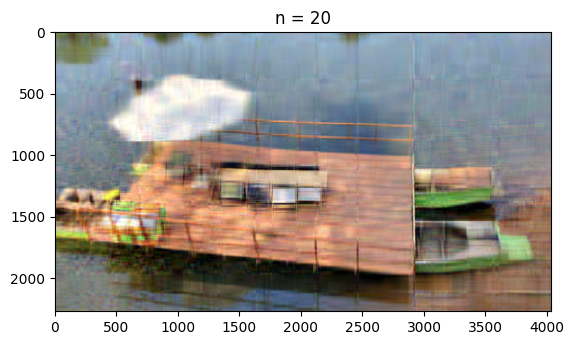

Image successfully saved


In [6]:
# 4. Loop through different ranks for each channel and approximate
n = 20

# SVD for each channel
U_B, S_B, Vt_B = np.linalg.svd(B, full_matrices=False)
U_R, S_R, Vt_R = np.linalg.svd(R, full_matrices=False)
U_G, S_G, Vt_G = np.linalg.svd(G, full_matrices=False)

R_compressed = U_R[:, :n] @ np.diag(S_R[:n]) @ Vt_R[:n, :]
G_compressed = U_G[:, :n] @ np.diag(S_G[:n]) @ Vt_G[:n, :]
B_compressed = U_B[:, :n] @ np.diag(S_B[:n]) @ Vt_B[:n, :]

# Combining the compressed channels
compressed_image = cv2.merge([np.clip(B_compressed, 1, 255), np.clip(G_compressed, 1, 255), np.clip(R_compressed, 1, 255)])
compressed_image = compressed_image.astype(np.uint8)
plt.imshow(cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB))
plt.title('n = %s' % n)
plt.show()
success = cv2.imwrite(f'/home/kanchnak/code/image-compression-with-SVD/output_color/{n}_color_compressed.jpg', compressed_image)

if success:
    print(f"Image successfully saved")
else:
    print("Failed to save the image.")
